## Amazon Book Reviews Part Ia: Heatmaps of Reviews

#### This is the 5-core dataset which means that each user and item has at least 5 reviews. The dataset has ~9 million reviews: http://jmcauley.ucsd.edu/data/amazon/. 

### Introduction

Heatmaps are constructed from reviews and ratings given by the users.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io import gbq
%matplotlib inline

In [2]:
project_id = 'dotted-chiller-156222'

In [3]:
query1 = "SELECT reviewerID, unixReviewTime FROM amazon_book_small.rev1 \
WHERE unixReviewTime >= '1996-01-01 00:00:00 UTC' AND unixReviewTime < '2013-01-01 00:00:00 UTC'"

In [4]:
da = gbq.read_gbq(query1, project_id=project_id)

Requesting query... ok.
Query running...
  Elapsed 11.49 s. Waiting...
  Elapsed 22.14 s. Waiting...
  Elapsed 32.79 s. Waiting...
Query done.
Processed: 201.4 Mb

Retrieving results...
  Got page: 1; 3.0% done. Elapsed 41.24 s.
  Got page: 2; 5.0% done. Elapsed 44.88 s.
  Got page: 3; 8.0% done. Elapsed 49.26 s.
  Got page: 4; 10.0% done. Elapsed 53.88 s.
  Got page: 5; 13.0% done. Elapsed 58.31 s.
  Got page: 6; 15.0% done. Elapsed 63.19 s.
  Got page: 7; 18.0% done. Elapsed 67.44 s.
  Got page: 8; 20.0% done. Elapsed 72.61 s.
  Got page: 9; 23.0% done. Elapsed 77.14 s.
  Got page: 10; 25.0% done. Elapsed 81.12 s.
  Got page: 11; 28.0% done. Elapsed 86.01 s.
  Got page: 12; 30.0% done. Elapsed 89.97 s.
  Got page: 13; 33.0% done. Elapsed 94.91 s.
  Got page: 14; 36.0% done. Elapsed 99.09 s.
  Got page: 15; 38.0% done. Elapsed 103.49 s.
  Got page: 16; 41.0% done. Elapsed 108.97 s.
  Got page: 17; 43.0% done. Elapsed 113.52 s.
  Got page: 18; 46.0% done. Elapsed 117.49 s.
  Got page: 

In [5]:
da.head(1)

,reviewerID,unixReviewTime
0,ANH2CGBREFYO3,2012-02-28


In [6]:
query2 = "SELECT reviewerID, unixReviewTime FROM amazon_book_small.rev1 \
WHERE unixReviewTime >= '2013-01-02 00:00:00 UTC' AND unixReviewTime < '2015-01-01 00:00:00 UTC'"

In [7]:
db = gbq.read_gbq(query2, project_id=project_id)

Requesting query... ok.
Query running...
  Elapsed 11.31 s. Waiting...
  Elapsed 21.96 s. Waiting...
Query done.
Processed: 201.4 Mb

Retrieving results...
  Got page: 1; 2.0% done. Elapsed 36.0 s.
  Got page: 2; 4.0% done. Elapsed 40.85 s.
  Got page: 3; 6.0% done. Elapsed 44.99 s.
  Got page: 4; 8.0% done. Elapsed 49.37 s.
  Got page: 5; 10.0% done. Elapsed 53.42 s.
  Got page: 6; 12.0% done. Elapsed 57.34 s.
  Got page: 7; 14.0% done. Elapsed 62.05 s.
  Got page: 8; 16.0% done. Elapsed 66.34 s.
  Got page: 9; 18.0% done. Elapsed 70.01 s.
  Got page: 10; 20.0% done. Elapsed 74.2 s.
  Got page: 11; 22.0% done. Elapsed 78.21 s.
  Got page: 12; 24.0% done. Elapsed 81.85 s.
  Got page: 13; 26.0% done. Elapsed 86.56 s.
  Got page: 14; 28.0% done. Elapsed 91.09 s.
  Got page: 15; 30.0% done. Elapsed 95.42 s.
  Got page: 16; 32.0% done. Elapsed 100.16 s.
  Got page: 17; 34.0% done. Elapsed 104.22 s.
  Got page: 18; 36.0% done. Elapsed 107.9 s.
  Got page: 19; 38.0% done. Elapsed 111.94 s.
 

In [8]:
df = pd.concat([da, db])

In [85]:
df.head(1)

,reviewerID,unixReviewTime
0,ANH2CGBREFYO3,2012-02-28


In [9]:
df.shape

(8889543, 2)

In [25]:
a = df.groupby([df.unixReviewTime.dt.month, df.unixReviewTime.dt.year]).size()
a.index.set_levels([['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                   [1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 
                    2010, 2011, 2012, 2013, 2014]],inplace=True)
a = a.unstack().fillna(0)
a

unixReviewTime,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
unixReviewTime,,,,,,,,,,,,,,,,,,,
Jan,0.0,5.0,599.0,1044.0,5714.0,8134.0,9115.0,9325.0,10019.0,12986.0,16790.0,24313.0,22729.0,28999.0,33773.0,45504.0,69108.0,255818.0,324566.0
Feb,0.0,2.0,564.0,943.0,4894.0,7133.0,7570.0,7910.0,8946.0,10915.0,15338.0,16908.0,20566.0,24764.0,32158.0,39445.0,63211.0,231363.0,275613.0
Mar,0.0,4.0,718.0,1018.0,5766.0,7463.0,8841.0,8576.0,9758.0,12936.0,17682.0,20017.0,20742.0,27178.0,34468.0,44534.0,74492.0,257610.0,313520.0
Apr,0.0,9.0,817.0,1124.0,6541.0,7147.0,8782.0,8350.0,9369.0,12617.0,14228.0,16903.0,21102.0,26737.0,32336.0,45795.0,71650.0,247937.0,303157.0
May,1.0,13.0,837.0,1162.0,9212.0,8010.0,8416.0,8746.0,9096.0,12706.0,15142.0,20953.0,22096.0,29590.0,34495.0,46748.0,75958.0,246395.0,303092.0
Jun,1.0,22.0,929.0,1412.0,9320.0,8607.0,8334.0,9263.0,10209.0,12957.0,16274.0,19123.0,22733.0,29423.0,33066.0,48712.0,76018.0,240645.0,292696.0
Jul,0.0,22.0,1039.0,1231.0,9687.0,9729.0,9468.0,10017.0,10877.0,14857.0,17776.0,20540.0,24079.0,29501.0,35381.0,50878.0,82041.0,254603.0,161471.0
Aug,1.0,294.0,836.0,1278.0,8962.0,9846.0,8730.0,8355.0,11498.0,16512.0,17578.0,21138.0,24921.0,29982.0,34683.0,53283.0,87068.0,255532.0,0.0
Sep,1.0,266.0,778.0,1223.0,6808.0,7379.0,7905.0,8509.0,10881.0,14763.0,13840.0,20430.0,23401.0,31394.0,35151.0,53528.0,111207.0,238994.0,0.0


(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5]), <a list of 12 Text yticklabel objects>)

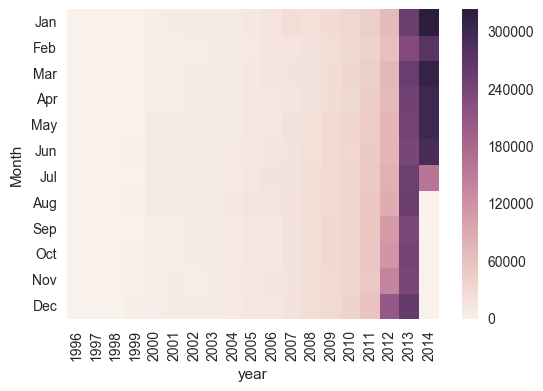

In [43]:
plt.figure(figsize= [6, 4])
sns.heatmap(a)
plt.ylabel('Month')
plt.xlabel('year')
plt.xticks(rotation = 'vertical')
plt.yticks(rotation = 'horizontal')

This heatmap is not very useful because the number of reviews in 2013. I am going to make three plots in the year range:a) 1998-2007, b) 2007-2011 and c) 2011-2014.

In [61]:
mask = (df['unixReviewTime'] > '1998-01-01') & (df['unixReviewTime'] <= '2006-12-31')

In [62]:
d_98_2006 = df.loc[mask]

In [69]:
a = d_98_2006.groupby([d_98_2006.unixReviewTime.dt.month, d_98_2006.unixReviewTime.dt.year]).size()
a.index.set_levels([['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                   [1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006]],inplace=True)
a = a.unstack().fillna(0)
a

unixReviewTime,1998,1999,2000,2001,2002,2003,2004,2005,2006
unixReviewTime,,,,,,,,,
Jan,588,1044,5714,8134,9115,9325,10019,12986,16790
Feb,564,943,4894,7133,7570,7910,8946,10915,15338
Mar,718,1018,5766,7463,8841,8576,9758,12936,17682
Apr,817,1124,6541,7147,8782,8350,9369,12617,14228
May,837,1162,9212,8010,8416,8746,9096,12706,15142
Jun,929,1412,9320,8607,8334,9263,10209,12957,16274
Jul,1039,1231,9687,9729,9468,10017,10877,14857,17776
Aug,836,1278,8962,9846,8730,8355,11498,16512,17578
Sep,778,1223,6808,7379,7905,8509,10881,14763,13840


(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5]), <a list of 12 Text yticklabel objects>)

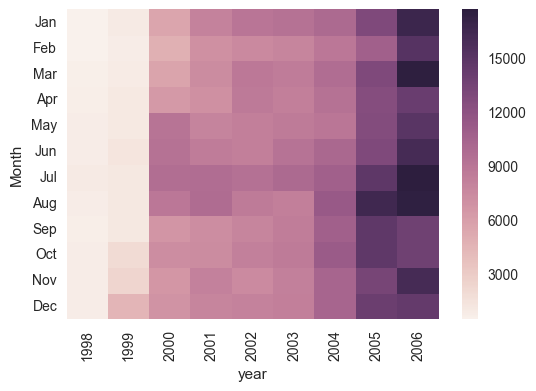

In [70]:
sns.heatmap(a)
plt.ylabel('Month')
plt.xlabel('year')
plt.xticks(rotation = 'vertical')
plt.yticks(rotation = 'horizontal')

July and August are popular months for writing reviews : summer readings? Writing reviews gained popularity in 2005. 

In [71]:
mask1 = (df['unixReviewTime'] > '2007-01-01') & (df['unixReviewTime'] <= '2011-12-31')

In [76]:
d_2007_2011 = df.loc[mask1]

In [78]:
s = d_2007_2011.groupby([d_2007_2011.unixReviewTime.dt.month, d_2007_2011.unixReviewTime.dt.year]).size()
s.index.set_levels([['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                   [2007, 2008, 2009, 2010, 2011]],inplace=True)
s = s.unstack().fillna(0)
s

unixReviewTime,2007,2008,2009,2010,2011
unixReviewTime,,,,,
Jan,23764,22729,28999,33773,45504
Feb,16908,20566,24764,32158,39445
Mar,20017,20742,27178,34468,44534
Apr,16903,21102,26737,32336,45795
May,20953,22096,29590,34495,46748
Jun,19123,22733,29423,33066,48712
Jul,20540,24079,29501,35381,50878
Aug,21138,24921,29982,34683,53283
Sep,20430,23401,31394,35151,53528


(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5]), <a list of 12 Text yticklabel objects>)

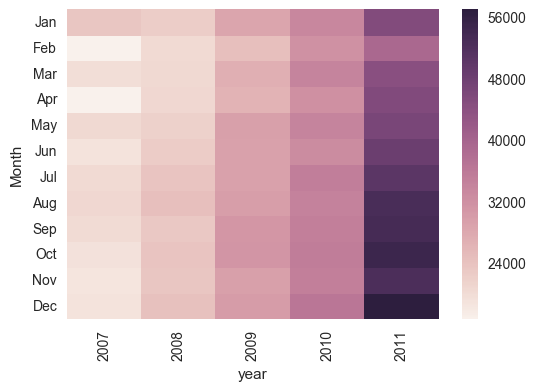

In [80]:
sns.heatmap(s)
plt.ylabel('Month')
plt.xlabel('year')
plt.xticks(rotation = 'vertical')
plt.yticks(rotation = 'horizontal')

2007-2010 are quiet years - US economic slowdown!

In [81]:
mask2 = (df['unixReviewTime'] > '2012-01-01') & (df['unixReviewTime'] <= '2014-12-31')

In [82]:
d_2011_2014 = df.loc[mask2]

In [83]:
t = d_2011_2014.groupby([d_2011_2014.unixReviewTime.dt.month, d_2011_2014.unixReviewTime.dt.year]).size()
t.index.set_levels([['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                   [2012, 2013, 2014]],inplace=True)
t = t.unstack().fillna(0)
t

unixReviewTime,2012,2013,2014
unixReviewTime,,,
Jan,66939.0,255818.0,324566.0
Feb,63211.0,231363.0,275613.0
Mar,74492.0,257610.0,313520.0
Apr,71650.0,247937.0,303157.0
May,75958.0,246395.0,303092.0
Jun,76018.0,240645.0,292696.0
Jul,82041.0,254603.0,161471.0
Aug,87068.0,255532.0,0.0
Sep,111207.0,238994.0,0.0


(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5]), <a list of 12 Text yticklabel objects>)

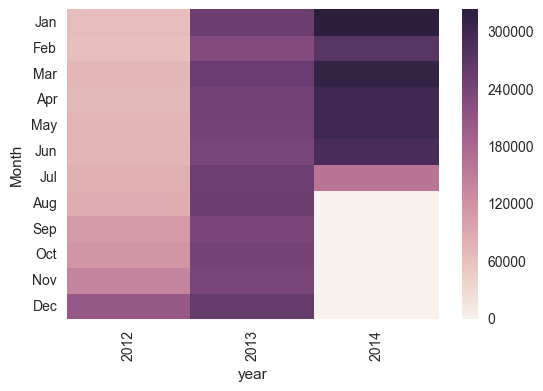

In [84]:
sns.heatmap(t)
plt.ylabel('Month')
plt.xlabel('year')
plt.xticks(rotation = 'vertical')
plt.yticks(rotation = 'horizontal')

We have data upto July - 2014. Again, 2013 was very busy year.